Here, conditions is the initial conditions in (Hennequin, 2014), from top 6 eigenvectors

I have 2 questions:
1. Is firing rates fluctuate more slowly compared to the paper? 
2. There is little difference between with and without condition-independent input (I'm sure I define the same way as the paper)

In [1]:
import numpy as np
from lib.dynamics_diff import Dynamics
from lib.plotting import plot_energy, plot_eig, set_figure, plot_fr_per_cond
from lib.defaults import Main
from lib.gramians import Make

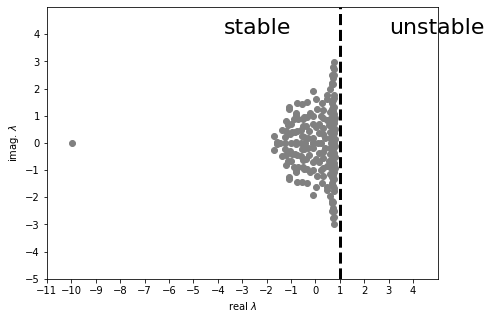

In [2]:
plot_eig(Main().w_rec)

In [3]:
# spontaneous is generated in setup with 20*N(1, 0.15^2)
spontaneous = np.loadtxt('spontaneous.txt')
spontaneous = spontaneous[:,None]
t_move = 0.6
cond=6
spontaneous.mean(),spontaneous.var()

(20.250171984139687, 8.872440348607741)

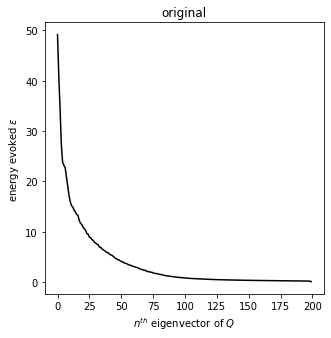

In [4]:
# plot energy
G = Make(Main().a)
plot_energy(G.O.evals)

# top 6 eigenvectors of 𝑄
x0 = 1.5*Main().n**0.5*G.O.evecs 

### Q1: Firing rates fluctuate more slowly compared to the paper. Is there a mistake?

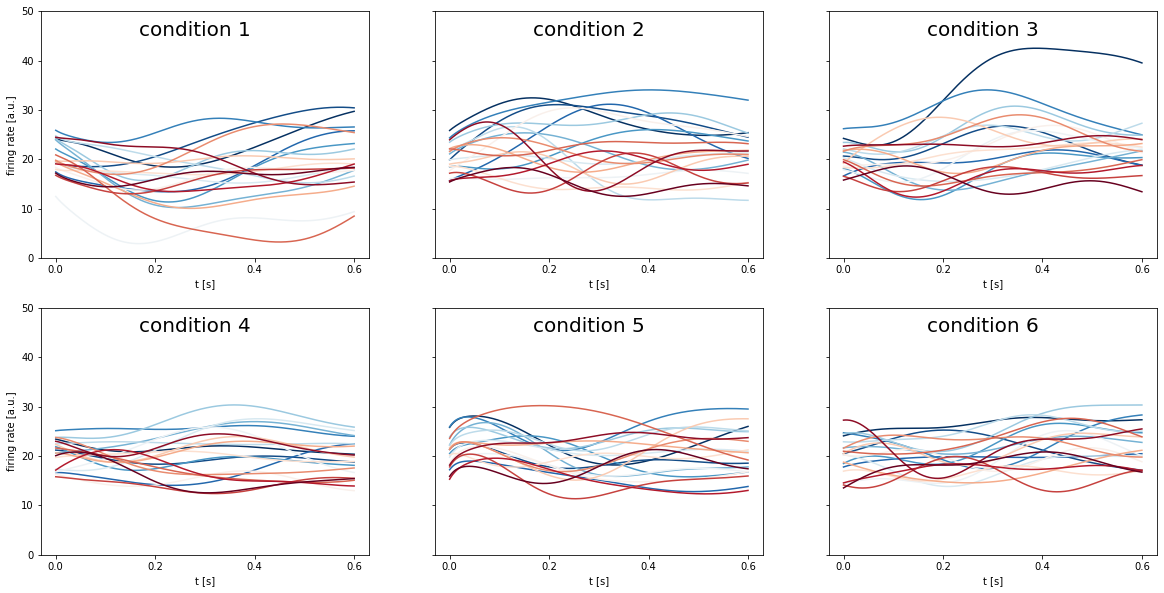

In [5]:
# from top 6 eigenvectors
xstars = (x0 + spontaneous)[:,:cond] 

rr = np.array(Dynamics().run(t_move, xstars, spontaneous))
axes = set_figure(cond)    
for j in range(cond):
    plot_fr_per_cond(axes, j, t_move,rr[:,:,j], xstars)

###  with condition-independent input

In [9]:
# Here, I show the dynamics function explicitly
# with mov_input
def sim_conds(t_move,x0,cond):    
    axes = set_figure(cond)       
    xstars = (x0 + spontaneous)[:,:cond] 
    
    dt = Main().dt  
    tau = Main().tau  #150e-3
    W = Main().w_rec
    nl = Main().nl
    t_steps = int(t_move/dt) + 1  
    
    # dynamics explicitly
    h = spontaneous - W @ nl(spontaneous)

    # there is no sampling_dt
    n_c_X_t = np.zeros((t_steps, Main().n, xstars.shape[1]))
    n_c_X_t[0,:,:] = xstars 
    
    for t in range(t_steps-1):          
        dx = ( -n_c_X_t[t,:,:] + W @ nl(n_c_X_t[t,:,:]) + h + Main().mov_input(t) )* dt/tau
        n_c_X_t[t+1,:,:] = n_c_X_t[t,:,:] + dx

    n_c_R_t = nl(n_c_X_t)
    # loop in condition
    for j in range(cond):
        plot_fr_per_cond(axes, j, t_move,n_c_R_t[:,:,j], xstars)
    return n_c_R_t

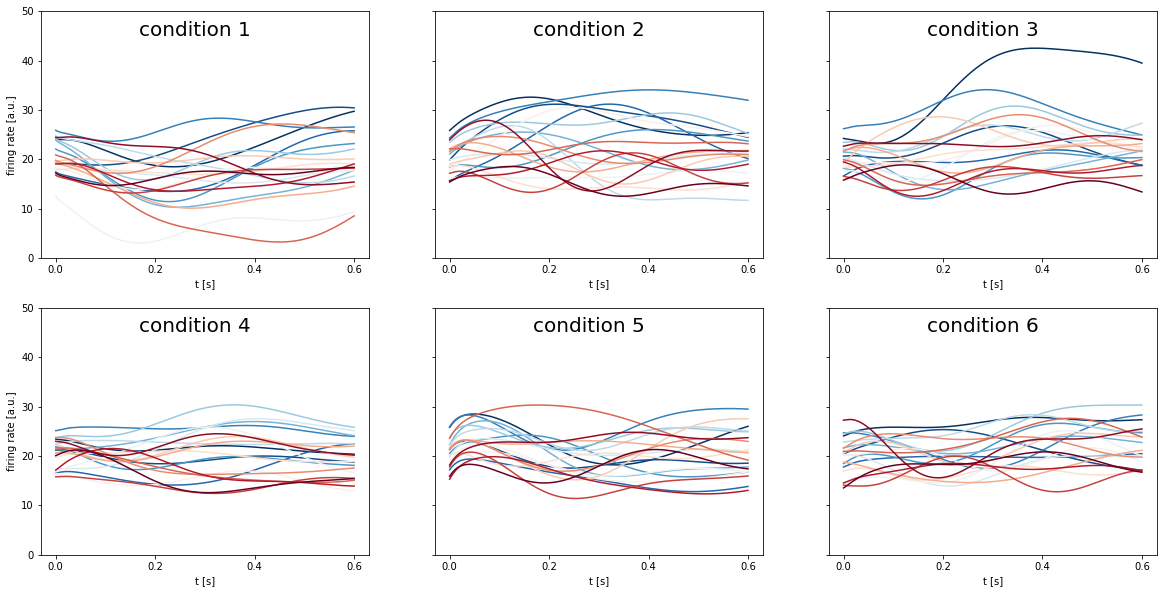

In [10]:
# trajectories starting from top 6 eigenvectors
r_cond= sim_conds(t_move,x0,cond)

###  without condition independent input

In [11]:
# Here, I show the dynamics function explicitly
# no mov_input
def sim_conds0(t_move,x0,cond):    
    axes = set_figure(cond)       
    xstars = (x0 + spontaneous)[:,:cond] 
    
    dt = Main().dt  
    tau = Main().tau  #150e-3
    W = Main().w_rec
    nl = Main().nl
    t_steps = int(t_move/dt) + 1  
    
    # dynamics explicitly
    h = spontaneous - W @ nl(spontaneous)

    # there is no sampling_dt
    n_c_X_t = np.zeros((t_steps, Main().n, xstars.shape[1]))
    n_c_X_t[0,:,:] = xstars 
    
    for t in range(t_steps-1):          
        dx = ( -n_c_X_t[t,:,:] + W @ nl(n_c_X_t[t,:,:]) + h )* dt/tau  # no mov_input
        n_c_X_t[t+1,:,:] = n_c_X_t[t,:,:] + dx

    n_c_R_t = nl(n_c_X_t)
    # loop in condition
    for j in range(cond):
        plot_fr_per_cond(axes, j, t_move,n_c_R_t[:,:,j], xstars)
    return n_c_R_t

###  Q2: There is little difference between with and without input

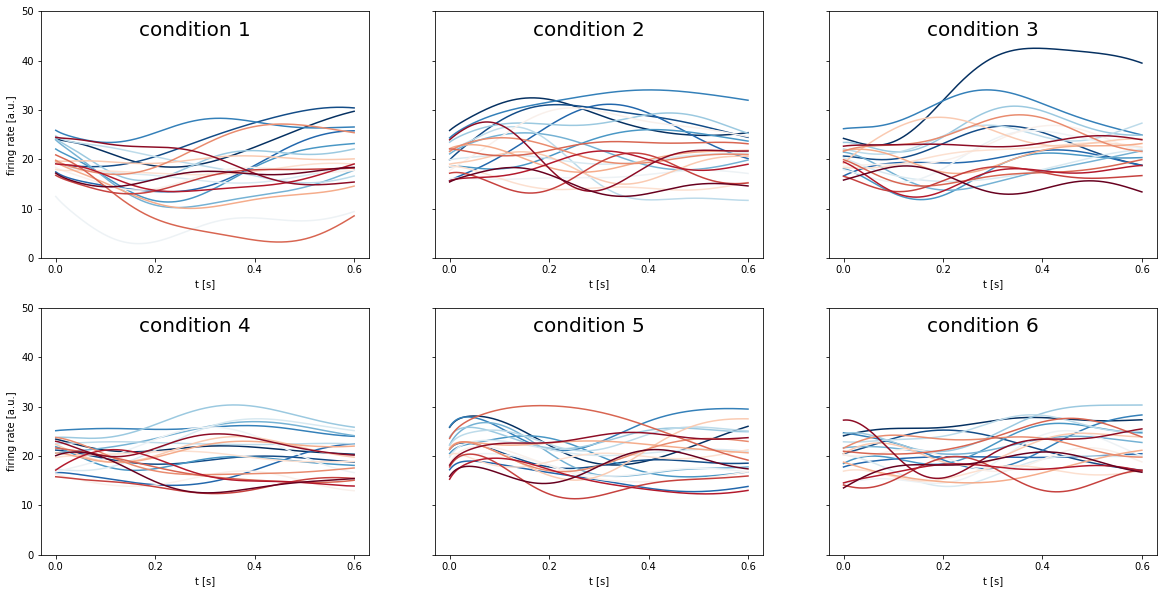

In [12]:
r0_cond= sim_conds0(t_move,x0,cond)

Besides, I change tau from 150e-3 (defaults) to 100e-3 to make changes fastly

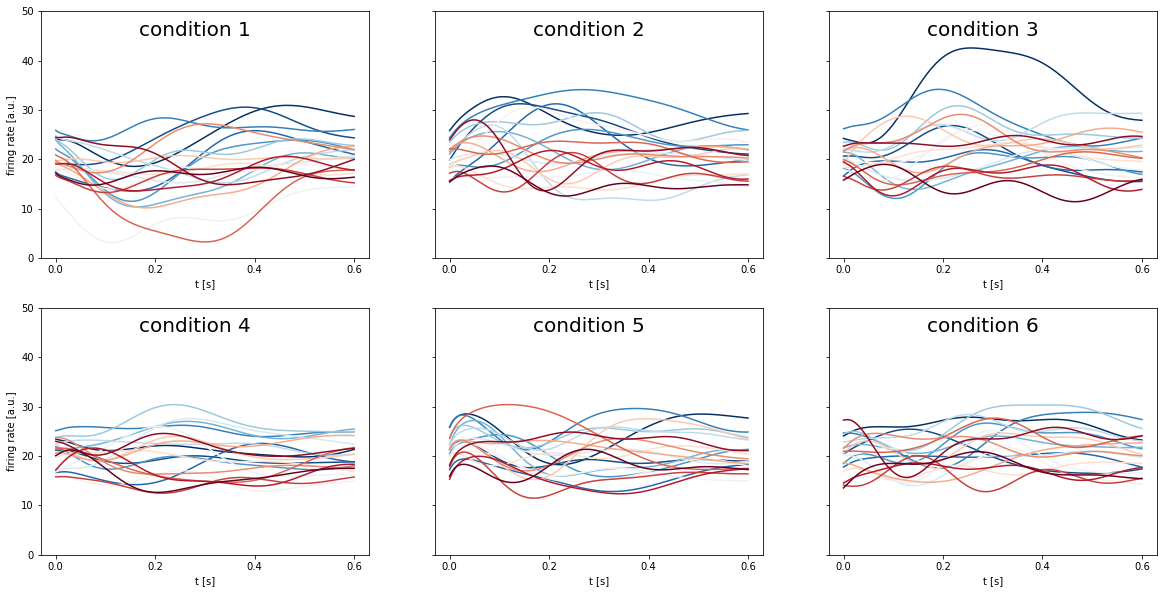

In [14]:
def sim_conds2(t_move,x0,cond):    
    axes = set_figure(cond)       
    xstars = (x0 + spontaneous)[:,:cond] 
    
    dt = Main().dt  
    tau = 100e-3
    W = Main().w_rec
    nl = Main().nl
    t_steps = int(t_move/dt) + 1  
    
    # dynamics explicitly
    h = spontaneous - W @ nl(spontaneous)

    # there is no sampling_dt
    n_c_X_t = np.zeros((t_steps, Main().n, xstars.shape[1]))
    n_c_X_t[0,:,:] = xstars 
    
    for t in range(t_steps-1):          
        dx = ( -n_c_X_t[t,:,:] + W @ nl(n_c_X_t[t,:,:]) + h + Main().mov_input(t) )* dt/tau
        n_c_X_t[t+1,:,:] = n_c_X_t[t,:,:] + dx

    n_c_R_t = nl(n_c_X_t)
    # loop in condition
    for j in range(cond):
        plot_fr_per_cond(axes, j, t_move,n_c_R_t[:,:,j], xstars)
    return n_c_R_t

_= sim_conds2(t_move,x0,cond)